<a href="https://colab.research.google.com/github/vi-dentata/spaceaero-2022/blob/main/Kuznetsova_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

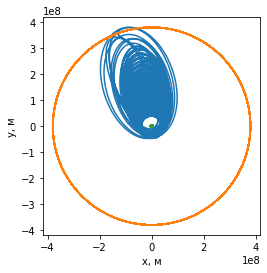

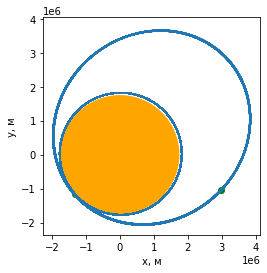

Орбита относительно Луны


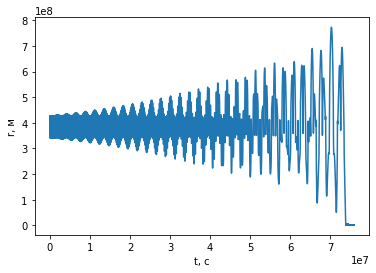

Pacстояние парусник-Луна


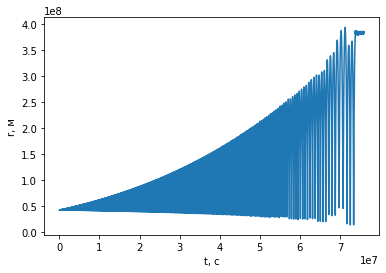

Pасстояние парусник-Земля
Pасстояние парусник - поверхность Луны: 26.752665287155892
Время полёта: Дни: 854 Часы: 9 Минуты: 29 Cекунды: 10


In [2]:
M_earth = 5.9726e24 
M_moon = 7.3477e22   
R_earth = 6.378100e6   
R_moon = 1737.10e3
G = 6.67e-11        
R_moon_earth = 384399e3 
m = 10
s = 100
p = 9.08e-6 #значение давления солнечного ветра, взято с https://ru.wikipedia.org/wiki/Давление_электромагнитного_излучения
r_moon = R_moon_earth * M_earth / (M_moon + M_earth)
r_earth = R_moon_earth * M_moon / (M_moon + M_earth)
step = 0
x = np.zeros(10000000)
y = np.zeros(10000000)
vx = np.zeros(10000000)
vy = np.zeros(10000000)
x_earth = np.zeros(10000000)
y_earth = np.zeros(10000000)
x_moon = np.zeros(10000000)
y_moon = np.zeros(10000000)
tim =  np.zeros(10000000)
r_rocket_earth = np.zeros(10000000)
r_rocket_moon = np.zeros(10000000)
dt  = 10
#Будем отслеживать положение Земли и Луны относительно барицентра
#earth/moon_position  угол на который смещён объект относительно оси абсцисс
moon_position = 0 
x_moon[0] = r_moon * np.cos(moon_position)
y_moon[0] = r_moon * np.sin(moon_position)
earth_position = np.pi
x_earth[0] = r_earth * np.cos(earth_position)
y_earth[0] = r_earth * np.sin(earth_position)
step1 = 7381975
step2 = 8103815
x[0] = 42160e3 - r_earth
y[0] = 0.0001
vy[0] = 3073.9 - G *(M_earth+M_moon) / (R_moon_earth)**3 * r_earth
vx[0] = 0.0001
fl = True
k1 = 0.375
k2 = 0.9
while step < 9500000:
  #пересчёт положения парусника
  if np.arctan2(vy[step] , vx[step]) > -90 * np.pi / 180 and np.arctan2(vy[step] , vx[step]) < 83 * np.pi / 180 and fl: #Условие на открытие парусника
    vx[step+1] = vx[step] + (-G * M_earth / ((x[step] - x_earth[step]) ** 2 + 
                                             (y[step] - y_earth[step])** 2) * np.cos(np.arctan2((y[step] - y_earth[step]) , (x[step] - x_earth[step])))  
    - G * M_moon / ((x[step] - x_moon[step]) ** 2 + 
                    (y[step] - y_moon[step])** 2)* np.cos(np.arctan2((y[step] - y_moon[step]) , (x[step] - x_moon[step]))) + s * p / m) * dt

    vy[step+1] = vy[step] + (-G * M_earth / ((x[step] - x_earth[step]) ** 2 + 
                                             (y[step] - y_earth[step])** 2) * np.sin(np.arctan2((y[step] - y_earth[step]) , (x[step] - x_earth[step])))
    - G * M_moon / ((x[step] - x_moon[step]) ** 2 + (y[step] - y_moon[step])** 2) * np.sin(np.arctan2((y[step] - y_moon[step]) , (x[step] - x_moon[step])))) * dt

  else:
    vx[step+1] = vx[step] + (-G * M_earth / ((x[step] - x_earth[step]) ** 2 + 
                                             (y[step] - y_earth[step])** 2) * np.cos(np.arctan2((y[step] - y_earth[step]) , (x[step] - x_earth[step]))) 
   - G * M_moon / ((x[step] - x_moon[step]) ** 2 +
                   (y[step] - y_moon[step])** 2) * np.cos(np.arctan2((y[step] - y_moon[step]) , (x[step] - x_moon[step])))) * dt

    vy[step+1] = vy[step] + (-G * M_earth / ((x[step] - x_earth[step]) ** 2 + 
                                             (y[step] - y_earth[step])** 2) * np.sin(np.arctan2((y[step] - y_earth[step]) , (x[step] - x_earth[step]))) 
    - G * M_moon / ((x[step] - x_moon[step]) ** 2 + 
                    (y[step] - y_moon[step])** 2) * np.sin(np.arctan2((y[step] - y_moon[step]) , (x[step] - x_moon[step])))) * dt
  step += 1
  x[step]  =x[step - 1] + vx[step] * dt
  y[step] = y[step - 1] + vy[step] * dt
  #пересчёт положения Земли и Луны
  earth_position += np.sqrt(G * (M_earth+M_moon) / (abs(R_moon_earth))** 3) * dt
  moon_position += np.sqrt(G * (M_earth+M_moon) / (abs(R_moon_earth))** 3) * dt
  x_earth[step] = r_earth * np.cos(earth_position)
  y_earth[step] = r_earth * np.sin(earth_position)  
  x_moon[step] = r_moon * np.cos(moon_position)
  y_moon[step] = r_moon * np.sin(moon_position)

  r_rocket_moon[step] = np.sqrt((x_moon[step] - x[step])**2 +(y_moon[step] - y[step])**2)
  r_rocket_earth[step] = np.sqrt((x_earth[step] - x[step])**2 +(y_earth[step] - y[step])**2)
  tim[step] = tim[step - 1] + dt
  #первый дополнительный тормозной импульс для выхода на эллиптическую орбиту
  if step == step1:
    step +=1
    dt = 1
    fl = False
    vx[step] = vx[step - 1] * k1
    vy[step] =  vy[step - 1] * k1
    x[step] = x[step - 1]
    y[step] = y[step-1]
    x_earth[step] =x_earth[step-1]
    y_earth[step] =y_earth[step-1]
    x_moon[step] = x_moon[step-1]
    y_moon[step] =y_moon[step-1]
    tim[step] = tim[step-1]
    r_rocket_earth[step] = r_rocket_earth[step-1]
    r_rocket_moon[step] = r_rocket_moon[step-1]
  #второй дополнительный тормозной импульс для снижения апоцентра орбиты
  if step == step2:
    step +=1
    dt = 1
    vx[step] = vx[step - 1] * k2
    vy[step] =  vy[step - 1] * k2
    x[step] = x[step - 1]
    y[step] = y[step-1]
    x_earth[step] =x_earth[step-1]
    y_earth[step] =y_earth[step-1]
    x_moon[step] = x_moon[step-1]
    y_moon[step] =y_moon[step-1]
    tim[step] = tim[step-1]
    r_rocket_earth[step] = r_rocket_earth[step-1]
    r_rocket_moon[step] = r_rocket_moon[step-1]
plt.xlabel("x, м")
plt.ylabel("y, м")
plt.plot(x[:step1], y[:step1]) #орбита паруса - синяя линия
plt.plot(x_moon[1:step1], y_moon[1:step1]) #орбита Луны - оранжевый цвет
plt.plot(x_earth[:step1], y_earth[:step1]) # орбита Земли-зелёненькая точка 
plt.axis('square')
plt.show()

x_moon_rocket = list()
y_moon_rocket = list()
for i in range (step1  - 1,9500000 ):
  x_moon_rocket.append(x[i] - x_moon[i])
  y_moon_rocket.append(y[i] - y_moon[i])

plt.xlabel("x, м")
plt.ylabel("y, м")
circle1 = plt.Circle((0, 0), R_moon, color='orange', fill=True) #Луна
ax=plt.gca()
ax.add_patch(circle1)
plt.plot(x_moon_rocket, y_moon_rocket) 
#Отображение положений в которых производится дополнительный тормозящий импульс
plt.scatter(x_moon_rocket[0], y_moon_rocket[0], color = "green")
plt.scatter(x_moon_rocket[721841], y_moon_rocket[721841], color = "green")
plt.axis('square')
plt.show()
print("Орбита относительно Луны")

plt.xlabel("t, с")
plt.ylabel("r, м")
plt.plot(tim[1:9500000 ], r_rocket_moon[1:9500000 ])
plt.show()
print("Pacстояние парусник-Луна")

plt.xlabel("t, с")
plt.ylabel("r, м")
plt.plot(tim[1:9500000], r_rocket_earth[1:9500000])
plt.show()
print("Pасстояние парусник-Земля")

print("Pасстояние парусник - поверхность Луны:", ((r_rocket_moon[r_rocket_moon[step1:9499999].argmin()+step1]) - R_moon)/1000)
sec = step1 * 10
day = sec // 86400
hour = (sec - day * 86400) // 3600
min =   (sec - day * 86400  - hour * 3600) // 60
secc = sec % 60
print("Время полёта:", "Дни:", day, "Часы:", hour,"Минуты:",  min,"Cекунды:", secc)